# 비지도학습 Autoencoder
※ 출처 : 골빈해커의 3분딥러닝 텐서플로맛, 김진중 지음, 한빛미디어
![title](autoencoder4.png)

## 1. 라이브러리 임포트

In [15]:
#텐서플로, numpy, matplotlib의 라이브러리 임포트
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#MNIST 모듈 임포트
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 2. 옵션설정 
하이퍼마라미터로 사용할 옵션들을 따로 빼네어 코드를 구조화함

In [16]:
learning_rate = 0.01 #최적화 함수에서 사용할 학습률
training_epoch = 20  #전체 데이터를 학습할 총 횟수
batch_size = 100     #미니배치로 한번에 학습할 데이터(이미지)의 갯수
n_hidden = 256       #은닉층의 뉴런 개수
n_input = 28*28      #이미지 크기 28*28 = 784

## 3. 모델구성

In [17]:
# X라는 플레이스 홀더를 설정
X = tf.placeholder(tf.float32, [None, n_input])

# ENCODER 인코더, n_hidden개의 뉴런을 가진 은닉층 만듬
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))  #가중치 
b_encode = tf.Variable(tf.random_normal([n_hidden])) #편향변수
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode)) #sigmoid 활성화 함수 적용

# DECODER 디코더 (n_input과 n_hidden을 인코더와 반대로 입력)
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input])) #가중치
b_decode = tf.Variable(tf.random_normal([n_input])) #편향변수 
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode)) # 입력값을 은닉층의 크기로, 출력값을 입력층의 크기로 

## 4. 모델학습

### 손실함수
입력값과 출력값의 차이를 최소화함 (복원 오차 최소화)

\begin{align}
\frac{1}{m}\sum_i^m{(x_i-y_i)}^2
\end{align}

In [18]:
#손실함수(두 값의 거리차이) = X(평가하기 위한 실측값) - 디코더의 결과값
cost = tf.reduce_mean(tf.pow(X-decoder,2))

#최적화 함수 RMSPropOptimizer로 cost를 최소화 함
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

#학습진행
init = tf.global_variables_initializer() #변수 초기화
sess = tf.Session() # Session 오픈
sess.run(init) # 텐서플로우로 변수들 초기화 완료(학습 진행 준비 완료)

total_batch = int(mnist.train.num_examples / batch_size) #배치 갯수

for epoch in range(training_epoch): #train 테이터 셋으로 부터 전체 배치를 불러옴
    total_cost = 0
    
    for i in range(total_batch): #모든 배치들에 대하여 최적화 수행
        batch_xs, batch_ys = mnist.train.next_batch(batch_size) # 배치사이즈에 맞게 x, y값 생성
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs}) # X값(이미지데이터)를 통해 최적화 진행
        total_cost += cost_val 
        
    print('Epoct:', '%04d' % (epoch + 1), 'Avg.cost = ', '{:.4f}'.format(total_cost/total_batch)) # Epoct 별 cost 보여줌

print('최적화 완료!')

Epoct: 0001 Avg.cost =  0.1949
Epoct: 0002 Avg.cost =  0.0575
Epoct: 0003 Avg.cost =  0.0463
Epoct: 0004 Avg.cost =  0.0414
Epoct: 0005 Avg.cost =  0.0388
Epoct: 0006 Avg.cost =  0.0372
Epoct: 0007 Avg.cost =  0.0361
Epoct: 0008 Avg.cost =  0.0349
Epoct: 0009 Avg.cost =  0.0336
Epoct: 0010 Avg.cost =  0.0332
Epoct: 0011 Avg.cost =  0.0328
Epoct: 0012 Avg.cost =  0.0324
Epoct: 0013 Avg.cost =  0.0320
Epoct: 0014 Avg.cost =  0.0319
Epoct: 0015 Avg.cost =  0.0317
Epoct: 0016 Avg.cost =  0.0314
Epoct: 0017 Avg.cost =  0.0311
Epoct: 0018 Avg.cost =  0.0305
Epoct: 0019 Avg.cost =  0.0302
Epoct: 0020 Avg.cost =  0.0296
최적화 완료!


## 5. 결과확인
디코더로 생성해낸 결과를 직관적인 방법으로 확인하는 것, matplotlib을 이용해 이미지 출력

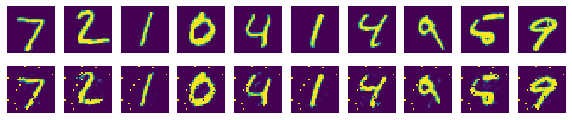

In [19]:
#10개의 확인 이미지 추출
sample_size = 10
samples = sess.run(decoder, feed_dict={X:mnist.test.images[:sample_size]}) # 디코더로 생성해낸 결과

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2)) # 이미지를 2줄로 보여줄 수 있도록 셋팅

for i in range(sample_size):
    ax[0][i].set_axis_off() # 입력된 이미지
    ax[1][i].set_axis_off() # 생성된 이미지(출력값)
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28))) #imshow : 이미지 출력함수
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))

plt.show()